<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np

#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html

from scipy.integrate import quad, fixed_quad, romberg, dblquad

#For plotting

import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [2]:
class Quad:
    def __init__(self, func, N, a, b):
        '''The class Quad takes four inputs: 
         fuc: a function input,
         N: number of grid points,
         a,b: left and right points'''
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.dx = (b - a) / N    

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [3]:
class Quad:
    def __init__(self, func, N, a, b):
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.dx = (b - a) / N

    def midpoint_rule(self):
        integral = 0
        for i in range(self.N):
            xi = self.a + (i + 0.5) * self.dx
            integral += self.func(xi)
        integral *= self.dx
        return integral

    def trapezoid_rule(self):
        integral = 0
        for i in range(1, self.N):
            xi = self.a + i * self.dx
            integral += 2 * self.func(xi)
        integral += self.func(self.a) + self.func(self.b)
        integral *= 0.5 * self.dx
        return integral

    def simpson_rule(self):
        if self.N % 2 != 0:
            raise ValueError("N must be even for Simpson's rule")

        integral = self.func(self.a) + self.func(self.b)

        for i in range(1, self.N, 2):
            xi = self.a + i * self.dx
            integral += 4 * self.func(xi)

        for i in range(2, self.N - 1, 2):
            xi = self.a + i * self.dx
            integral += 2 * self.func(xi)

        integral *= self.dx / 3
        return integral

<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

to get

$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$ where a = -1 and b = 1.

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

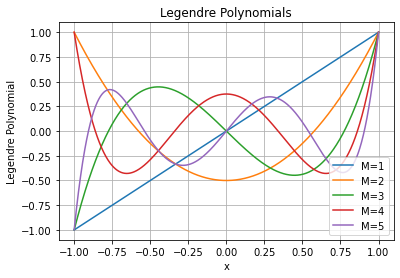

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

class Gauss_Quad:
    def __init__(self, order):
        self.order = order

    def legendre_polynomial(self, M):
        x = np.linspace(-1, 1, 1000)
        P = legendre(M)
        return P(x)

    def plot_legendre_polynomials(self):
        for M in self.order:
            legendre_poly = self.legendre_polynomial(M)
            plt.plot(np.linspace(-1, 1, 1000), legendre_poly, label=f'M={M}')

        plt.xlabel('x')
        plt.ylabel('Legendre Polynomial')
        plt.title('Legendre Polynomials')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
orders = [1, 2, 3, 4, 5]
quad_instance = Gauss_Quad(orders)
quad_instance.plot_legendre_polynomials()

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [5]:
import numpy as np
from scipy.special import legendre
from scipy.misc import derivative

class Gauss_Quad:
    def __init__(self, order):
        self.order = order

    def legendre_polynomial(self, M):
        x = np.linspace(-1, 1, 1000)
        P = legendre(M)
        return P(x)

    def gauss_legendre_quadrature(self, M, a, b):
        positions = []
        all_weights = []

        for m in M:
            P_M = legendre(m)
            P_M_prime = P_M.deriv()

            roots = self.newton_method(P_M, P_M_prime, m)
            
            # Calculate the weights
            weights = [2 / ((1 - x**2) * P_M_prime(x)**2) for x in roots]
            
            positions.append(roots)
            all_weights.append(weights)
        
        return positions, all_weights

    def newton_method(self, P_M, P_M_prime, m):
        roots = []
        for i in range(1, m+1):
            x0 = np.cos((4*i-1)*np.pi / (4*m+2))
            while True:
                f_x = P_M(x0)
                f_prime_x = P_M_prime(x0)
                x1 = x0 - f_x / f_prime_x
                if abs(x1 - x0) < 1e-10:
                    roots.append(x1)
                    break
                x0 = x1
        return roots

    def save_quadrature_data_to_file(self, M_values, positions, weights, filename):
        with open(filename, 'w') as file:
            for i, M in enumerate(M_values):
                file.write(f"M = {M}\n")
                for j in range(len(positions[i])):
                    file.write(f"Root {j+1}: {positions[i][j]}, Weight: {weights[i][j]}\n")
                file.write("\n")

orders = [1, 2, 3, 4, 5]
a = -1  # Left endpoint of the integration interval
b = 1   # Right endpoint of the integration interval

quad_instance = Gauss_Quad(orders)
positions, weights = quad_instance.gauss_legendre_quadrature(orders, a, b)
quad_instance.save_quadrature_data_to_file(orders, positions, weights, "gauss_legendre_quadrature.txt")

print(orders)
print(positions)
print(weights)

[1, 2, 3, 4, 5]
[[0.0], [0.5773502691896257, -0.577350269189626], [0.7745966692414834, 0.0, -0.7745966692414833], [0.8611363115940526, 0.33998104358485626, -0.3399810435848562, -0.8611363115940526], [0.906179845938664, 0.5384693101056831, -4.930380657631324e-32, -0.538469310105683, -0.906179845938664]]
[[2.0], [1.0, 0.9999999999999996], [0.5555555555555554, 0.8888888888888887, 0.5555555555555557], [0.34785484513745396, 0.6521451548625461, 0.6521451548625455, 0.34785484513745435], [0.23692688505618925, 0.47862867049936625, 0.5688888888888888, 0.4786286704993666, 0.23692688505618917]]


## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [11]:
from scipy.special import roots_legendre

M_values = [1, 2, 3, 4, 5]

roots_and_weights = [roots_legendre(M) for M in M_values]

for M, (roots, weights) in zip(M_values, roots_and_weights):
    print(f"Legendre Polynomial M={M}:")
    print("Roots:", roots)
    print("Weights:", weights)
    print()

Legendre Polynomial M=1:
Roots: [0.]
Weights: [2.]

Legendre Polynomial M=2:
Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]

Legendre Polynomial M=3:
Roots: [-0.77459667  0.          0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

Legendre Polynomial M=4:
Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

Legendre Polynomial M=5:
Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]



Our calculated values for the roots and weights for M = [1, 2, 3, 4, 5] are consistant 

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [6]:
import numpy as np
from scipy.special import roots_legendre

class Gauss_Quad:
    def __init__(self):
        self.order = None
        self.func = None

    def set_order(self, order):
        self.order = order

    def set_function(self, func):
        self.func = func

    def legendre_polynomial(self, M):
        x = np.linspace(-1, 1, 1000)
        P = legendre(M)
        return P(x)

    def gauss_legendre_quadrature(self, M, a, b):
        positions = []
        weights = []

        for m in M:
            roots, w = roots_legendre(m)
            positions.append(roots)
            weights.append(w)

        return positions, weights

    def gauss_legendre_integral(self, M, a, b):
        if self.func is None:
            raise ValueError("Function 'func' is not set. Use set_function to set the function.")
        
        positions, weights = self.gauss_legendre_quadrature(M, a, b)

        integrals = []
        for i, m in enumerate(M):
            integral = sum(weights[i] * self.func((b - a) * x / 2 + (a + b) / 2) for x in positions[i])
            integrals.append(integral)

        return integrals

def f(x):
    return x**2

orders = [1, 2, 3, 4, 5]
a = -1  # Left endpoint of the integration interval
b = 1   # Right endpoint of the integration interval

quad_instance = Gauss_Quad()
quad_instance.set_order(orders)
quad_instance.set_function(f)
integrals = quad_instance.gauss_legendre_integral(orders, a, b)

for i, M in enumerate(orders):
    print(f"Integral for Legendre Polynomial M={M}: {integrals[i]}")

Integral for Legendre Polynomial M=1: [0.]
Integral for Legendre Polynomial M=2: [0.66666667 0.66666667]
Integral for Legendre Polynomial M=3: [0.66666667 1.06666667 0.66666667]
Integral for Legendre Polynomial M=4: [0.59632259 1.11796312 1.11796312 0.59632259]
Integral for Legendre Polynomial M=5: [0.52650419 1.06361927 1.26419753 1.06361927 0.52650419]


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/2708135184.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


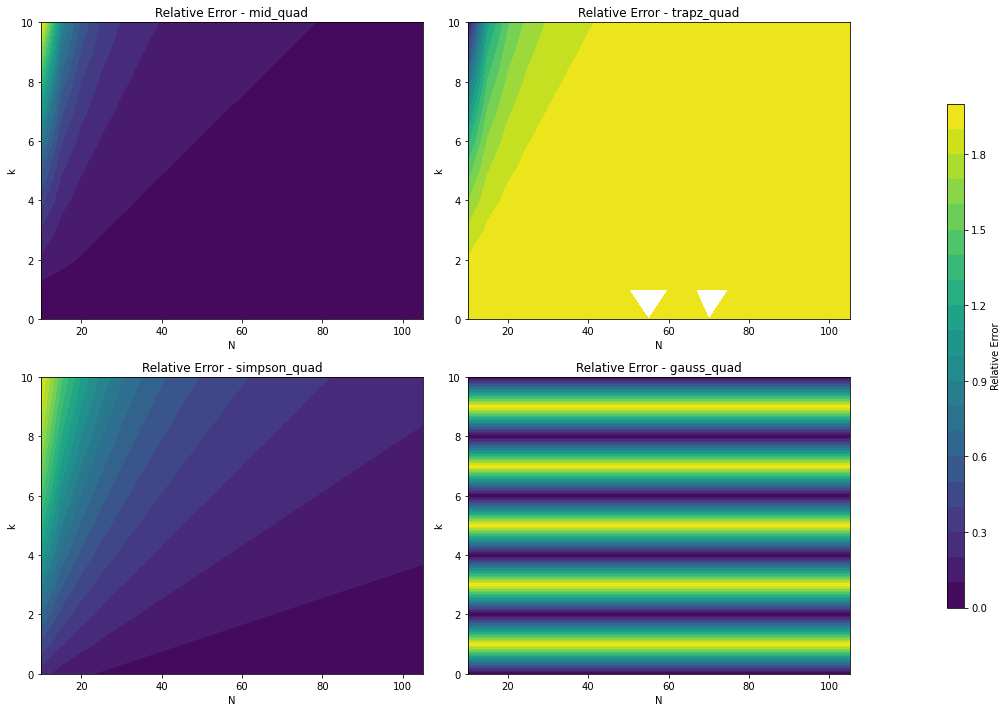

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import griddata

# Function to calculate the true integral value for the given k
def true_integral(k, a, b):
    return quad(lambda x: x**k, a, b)[0]

# Function to calculate the relative error
def relative_error(true_value, approx_value):
    return abs(2 * true_value - approx_value) / (true_value + approx_value)

# Function to calculate the quadrature value for a given method, order (k), and number of points (N)
def calculate_quadrature(method, k, N):
    # Define the test function
    test_function = lambda x: x**k

    # Calculate the true integral value
    true_value = true_integral(k, 0, 1)

    # Calculate the quadrature value
    if method == 'mid_quad':
        approx_value = 0.5 * (1 / N) * sum(test_function((2 * i + 1) / (2 * N)) for i in range(N))
    elif method == 'trapz_quad':
        approx_value = (1 / N) * (0.5 * test_function(0) + sum(test_function(i / N) for i in range(1, N)) + 0.5 * test_function(1))
    elif method == 'simpson_quad':
        h = 1 / N
        approx_value = (h / 3) * (test_function(0) + 4 * sum(test_function((2 * i - 1) / (2 * N)) for i in range(1, N)) + 2 * sum(test_function(i / N) for i in range(1, N - 1)) + test_function(1))
    elif method == 'gauss_quad':
        nodes, weights = np.polynomial.legendre.leggauss(N)
        approx_value = sum(w * test_function(x) for x, w in zip(nodes, weights))
    else:
        raise ValueError("Invalid method")

    # Calculate the relative error
    error = relative_error(true_value, approx_value)

    return error

# Generate data for the heatmap
k_values = np.arange(0, 11, 1)
N_values = np.arange(10, 106, 5)

methods = ['mid_quad', 'trapz_quad', 'simpson_quad', 'gauss_quad']

# Create a meshgrid for k and N values
k_mesh, N_mesh = np.meshgrid(k_values, N_values)

# Initialize arrays to store relative errors for each method
errors = {method: np.zeros_like(k_mesh, dtype=float) for method in methods}

# Calculate relative errors for each method
for method in methods:
    for i, k in enumerate(k_values):
        for j, N in enumerate(N_values):
            errors[method][j, i] = calculate_quadrature(method, k, N)

# Plot the heatmaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, method in enumerate(methods):
    ax = axes[i // 2, i % 2]
    c = ax.contourf(N_mesh, k_mesh, errors[method], cmap='viridis', levels=20)
    ax.set_title(f'Relative Error - {method}')
    ax.set_xlabel('N')
    ax.set_ylabel('k')

# Move colorbar to the right
cbar_ax = fig.add_axes([1.10, 0.15, 0.02, 0.7])  # [x, y, width, height]
cbar = fig.colorbar(c, cax=cbar_ax)
cbar.set_label('Relative Error')

plt.tight_layout()
plt.show()

## H) Fermi–Dirac


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/1677359849.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))
/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/1677359849.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))


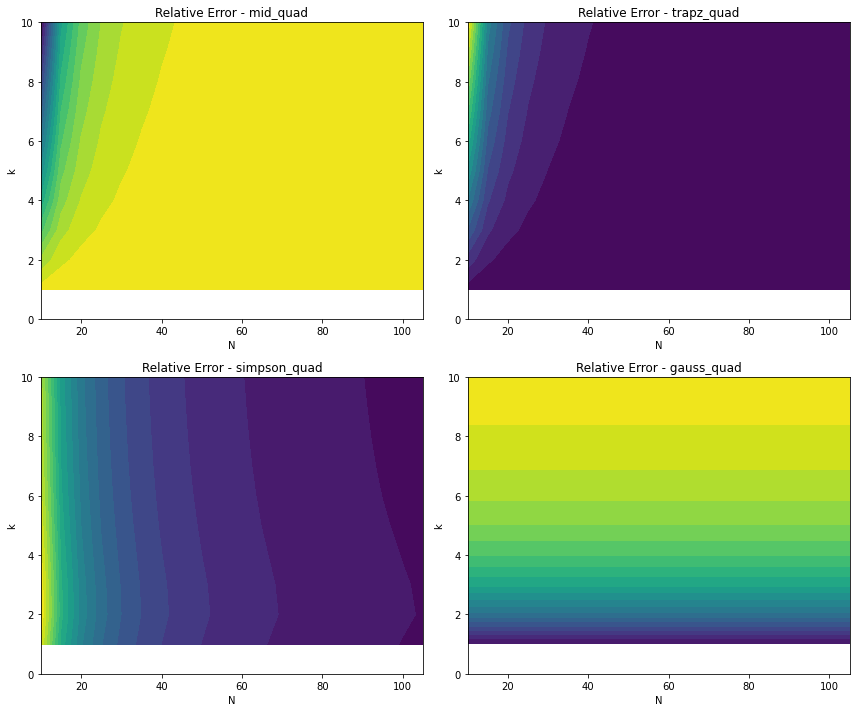

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import griddata

# Function to calculate the true integral value for the Fermi-Dirac distribution
def true_integral_fd(k, a, b):
    return 1 / k * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))

# Function to calculate the relative error
def relative_error_fd(true_value, approx_value):
    return abs(2 * true_value - approx_value) / (true_value + approx_value)

# Function to calculate the quadrature value for a given method, order (k), and number of points (N) for the Fermi-Dirac distribution
def calculate_quadrature_fd(method, k, N):
    # Define the Fermi-Dirac distribution
    fd_distribution = lambda x: 1 / (1 + np.exp(-k * x))

    # Calculate the true integral value for the Fermi-Dirac distribution
    true_value_fd = true_integral_fd(k, 0, 1)

    # Calculate the quadrature value
    if method == 'mid_quad':
        approx_value_fd = 0.5 * (1 / N) * sum(fd_distribution((2 * i + 1) / (2 * N)) for i in range(N))
    elif method == 'trapz_quad':
        approx_value_fd = (1 / N) * (0.5 * fd_distribution(0) + sum(fd_distribution(i / N) for i in range(1, N)) + 0.5 * fd_distribution(1))
    elif method == 'simpson_quad':
        h = 1 / N
        approx_value_fd = (h / 3) * (fd_distribution(0) + 4 * sum(fd_distribution((2 * i - 1) / (2 * N)) for i in range(1, N)) + 2 * sum(fd_distribution(i / N) for i in range(1, N - 1)) + fd_distribution(1))
    elif method == 'gauss_quad':
        nodes, weights = np.polynomial.legendre.leggauss(N)
        approx_value_fd = sum(w * fd_distribution(x) for x, w in zip(nodes, weights))
    else:
        raise ValueError("Invalid method")

    # Calculate the relative error for the Fermi-Dirac distribution
    error_fd = relative_error_fd(true_value_fd, approx_value_fd)

    return error_fd

# Generate data for the heatmap for the Fermi-Dirac distribution
k_values_fd = np.arange(0, 11, 1)
N_values_fd = np.arange(10, 106, 5)

methods_fd = ['mid_quad', 'trapz_quad', 'simpson_quad', 'gauss_quad']

# Create a meshgrid for k and N values for the Fermi-Dirac distribution
k_mesh_fd, N_mesh_fd = np.meshgrid(k_values_fd, N_values_fd)

# Initialize arrays to store relative errors for each method for the Fermi-Dirac distribution
errors_fd = {method: np.zeros_like(k_mesh_fd, dtype=float) for method in methods_fd}

# Calculate relative errors for each method for the Fermi-Dirac distribution
for method in methods_fd:
    for i, k_fd in enumerate(k_values_fd):
        for j, N_fd in enumerate(N_values_fd):
            errors_fd[method][j, i] = calculate_quadrature_fd(method, k_fd, N_fd)

# Plot the heatmaps for the Fermi-Dirac distribution
fig_fd, axes_fd = plt.subplots(2, 2, figsize=(12, 10))

for i, method_fd in enumerate(methods_fd):
    ax_fd = axes_fd[i // 2, i % 2]
    c_fd = ax_fd.contourf(N_mesh_fd, k_mesh_fd, errors_fd[method_fd], cmap='viridis', levels=20)
    ax_fd.set_title(f'Relative Error - {method_fd}')
    ax_fd.set_xlabel('N')
    ax_fd.set_ylabel('k')

# Move colorbar to the right
cbar_ax = fig.add_axes([1.10, 0.15, 0.02, 0.7])  # [x, y, width, height]
cbar = fig.colorbar(c, cax=cbar_ax)
cbar.set_label('Relative Error')

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [6]:
import numpy as np
from scipy.integrate import quad

def V(x):
    return x**4

def calculate_period(amplitude):
    m = 1  # Mass of the pendulum (given as 1)
    
    # Define the integrand function
    def integrand(x):
        return 1 / np.sqrt(V(amplitude) - V(x))
    
    # Calculate the integral using quad
    result, _ = quad(integrand, 0, amplitude)
    
    # Calculate the period
    period = np.sqrt(8 * m) * result
    return period

## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [7]:
import numpy as np
from scipy.integrate import fixed_quad

def V(x):
    return x**4

def integrand(x, amplitude):
    return 1 / np.sqrt(V(amplitude) - V(x))

def calculate_period_with_fixed_quad(amplitude, N):
    m = 1  # Mass of the pendulum (given as 1)
    a = 0.0  # Lower limit of integration

    # Calculate the integral with N points
    result_N, _ = fixed_quad(integrand, a, amplitude, n=N, args=(amplitude,))

    # Calculate the integral with 2N points
    result_2N, _ = fixed_quad(integrand, a, amplitude, n=2*N, args=(amplitude,))

    # Calculate the period with N and 2N points
    period_N = np.sqrt(8 * m) * result_N
    period_2N = np.sqrt(8 * m) * result_2N

    # Calculate the absolute error
    absolute_error = np.abs(period_N - period_2N)

    return period_N, absolute_error

# Amplitude 'a' for which you want to calculate the period
amplitude = 2.0
target_absolute_error = 1e-4  # Target absolute error

N = 1  # Start with N = 1
while True:
    period, absolute_error = calculate_period_with_fixed_quad(amplitude, N)
    if absolute_error < target_absolute_error:
        break
    N *= 2

print(f"For a = {amplitude}, N = {N} gives an absolute error less than 10^-4.")
print(f"Calculated Period: {period}")
print(f"Absolute Error: {absolute_error}")


For a = 2.0, N = 4096 gives an absolute error less than 10^-4.
Calculated Period: 1.8539243854218708
Absolute Error: 7.514166762412344e-05


## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [26]:
import numpy as np
from scipy.integrate import quad

def V(x):
    return x**4

def integrand(x, amplitude):
    return 1 / np.sqrt(V(amplitude) - V(x))

def calculate_period_with_quad(amplitude):
    m = 1  # Mass of the pendulum (given as 1)
    a = 0.0  # Lower limit of integration

    # Calculate the integral with quad
    result, error_estimate = quad(integrand, a, amplitude, args=(amplitude,))

    # Calculate the period
    period = np.sqrt(8 * m) * result

    return period, error_estimate

# Amplitude 'a' for which you want to calculate the period
amplitude = 2.0

# Calculate the period and error estimate using quad
period, error_estimate = calculate_period_with_quad(amplitude)

print(f"For a = {amplitude}, using 'quad' function:")
print(f"Calculated Period: {period}")
print(f"Error Estimate: {error_estimate:.4e}")

For a = 2.0, using 'quad' function:
Calculated Period: 1.854074677301701
Error Estimate: 7.0952e-11


 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [8]:
import numpy as np
from scipy.integrate import romberg

def V(x):
    return x**4

def integrand(x, amplitude):
    return 1 / np.sqrt(V(amplitude) - V(x))

def calculate_period_with_romberg(amplitude):
    a = 0.0  # Lower limit of integration

    # Use romberg to calculate the integral
    period = romberg(integrand, a, amplitude, args=(amplitude,))

    return period

# Amplitude 'a' for which you want to calculate the period
amplitude = 2.0

# Calculate the period using Romberg integration
period = calculate_period_with_romberg(amplitude)

print(f"For a = {amplitude}, using 'romberg' function:")
print(f"Calculated Period: {period}")

For a = 2.0, using 'romberg' function:
Calculated Period: nan


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/561411334.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(amplitude) - V(x))
/Users/MichaelCheng/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:718: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)
/Users/MichaelCheng/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  warnings.warn(


The issue with using the Romberg integration function is that the potential function, V(x), becomes infinite at the turning points of the harmonic oscillator. The Romberg integration method, as well as many other numerical integration techniques, can have difficulty handling functions with singularities or discontinuities.

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [10]:
import numpy as np
from scipy.integrate import quad

def V(x):
    return x**4

def calculate_period(amplitude, divmax=10, tolerance=1e-5):
    m = 1  # Mass of the particle (given as 1)
    
    # Define the integrand function
    def integrand(x):
        return 1 / np.sqrt(V(amplitude) - V(x))
    
    # Calculate the integral using quad with specified parameters
    result, error_estimate = quad(integrand, 0, amplitude, epsrel=tolerance, limit=divmax)
    
    # Calculate the period
    period = np.sqrt(8 * m) * result
    
    return period, error_estimate

# Amplitude 'a' for which you want to calculate the period
amplitude = 2.0

# Specify divmax and tolerance
divmax = 10
tolerance = 1e-5

# Calculate the period and error estimate
period, error_estimate = calculate_period(amplitude, divmax, tolerance)

# Display the results
print(f"For a = {amplitude}, using 'quad' function:")
print(f"Calculated Period: {period}")
print(f"Error Estimate: {error_estimate:.4e}")

For a = 2.0, using 'quad' function:
Calculated Period: 1.8540746772715795
Error Estimate: 1.7711e-06


## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [11]:
import numpy as np
from scipy.integrate import quad

def V(x):
    return x**4

def calculate_period(amplitude, divmax=10, tolerance=1e-5):
    m = 1  # Mass of the particle (given as 1)
    
    # Define the integrand function
    def integrand(x):
        return 1 / np.sqrt(V(amplitude) - V(x))
    
    # Calculate the integral using quad with specified parameters
    result, error_estimate = quad(integrand, 0, amplitude, epsrel=tolerance, limit=divmax)
    
    # Calculate the period
    period = np.sqrt(8 * m) * result
    
    return period, error_estimate

# Amplitude 'a' for which you want to calculate the period
amplitude = 2.0

# List of divmax values to compare
divmax_values = [10, 15]

# Tolerance for position uncertainty
tolerance = 1e-5

# Calculate the period and error estimate for each divmax value
for divmax in divmax_values:
    period, error_estimate = calculate_period(amplitude, divmax, tolerance)
    
    print(f"For a = {amplitude} and divmax = {divmax}, using 'quad' function:")
    print(f"Calculated Period: {period}")
    print(f"Error Estimate: {error_estimate:.4e}")
    print()

For a = 2.0 and divmax = 10, using 'quad' function:
Calculated Period: 1.8540746772715795
Error Estimate: 1.7711e-06

For a = 2.0 and divmax = 15, using 'quad' function:
Calculated Period: 1.8540746772715795
Error Estimate: 1.7711e-06



## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/2208268770.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(amplitude) - V(x))
/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_27082/2208268770.py:16: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = quad(integrand, 0, amplitude, epsrel=tolerance, limit=divmax)


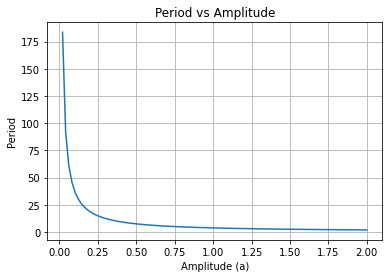

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def V(x):
    return x**4

def calculate_period(amplitude, divmax=10, tolerance=1e-5):
    m = 1  # Mass of the particle (given as 1)
    
    # Define the integrand function
    def integrand(x):
        return 1 / np.sqrt(V(amplitude) - V(x))
    
    # Calculate the integral using quad with specified parameters
    result, _ = quad(integrand, 0, amplitude, epsrel=tolerance, limit=divmax)
    
    # Calculate the period
    period = np.sqrt(8 * m) * result
    
    return period

# Amplitude values ranging from 0 to 2
amplitude_values = np.linspace(0, 2, 100)

# Calculate the period for each amplitude
periods = [calculate_period(amplitude) for amplitude in amplitude_values]

# Plot the results
plt.plot(amplitude_values, periods)
plt.title('Period vs Amplitude')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period')
plt.grid(True)
plt.show()

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [30]:
import scipy.integrate as spi
import numpy as np

# Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'

    return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))

# Integrate the function over the [0, 1] interval
result, error = spi.quad(blackbody_var, 0, 1)

print("The result of the integral is:", result)

The result of the integral is: 6.493939402266829


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_46139/2204836384.py:17: RuntimeWarning: overflow encountered in exp
  return z**3 / ((1 - z)**5 * (np.exp(z / (1 - z)) - 1))


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [37]:
import numpy as np
from scipy.integrate import fixed_quad

# Define the Planck function B(x)
def planck_function(x):
    return x**3 / (np.exp(x) - 1)

# Perform the integral from 0 to 1
result1, _ = fixed_quad(planck_function, 0, 1, n=1000)

# Define the second part of the integral with the change of variables: z = 1/x
def planck_function_z(z):
    x = 1 / z
    return (x**3 / (np.exp(x) - 1)) / z**2

# Perform the integral from 0 to 1 using the change of variables
result2, _ = fixed_quad(planck_function_z, 0, 1, n=1000)

# Combine the results
result = result1 + result2

# Calculate the Stefan-Boltzmann constant σ for T = 1
T = 1  
sigma = result / T**4

print("Stefan-Boltzmann constant (σ) =", sigma)

Stefan-Boltzmann constant (σ) = 6.493939402268021


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_46139/2410476507.py:14: RuntimeWarning: overflow encountered in exp
  return (x**3 / (np.exp(x) - 1)) / z**2


## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [41]:
import numpy as np
from scipy.integrate import quad

# Define the Planck function B(x)
def planck_function(x):
    return x**3 / (np.exp(x) - 1)

# Define the Planck integral from 0 to infinity
def planck_integral(infinity):
    result, _ = quad(planck_function, 0, infinity)
    return result

# Calculate the Stefan-Boltzmann constant σ for T = 1
T = 1  
sigma, _ = quad(lambda x: planck_integral(x) / T**4, 0, np.inf)

print("Stefan-Boltzmann constant (σ) =", sigma)

Stefan-Boltzmann constant (σ) = -31.380205526015768


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_46139/3819585610.py:6: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)
/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_46139/3819585610.py:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sigma, _ = quad(lambda x: planck_integral(x) / T**4, 0, np.inf)


<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


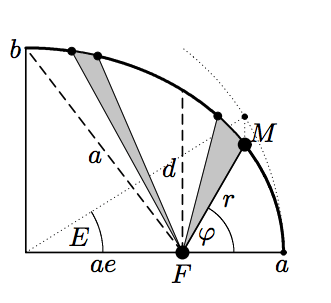


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the derivative
def f(q):
    return q

# Explicit Euler method
def explicit_euler(q, dt):
    return q + dt * f(q)

# Parameters
e = 0.6
Tf = 200
dt = 0.0000001  

# Initial conditions
q = 1.0

# Time array
time = np.arange(0, Tf, dt)

# Orbit simulation
orbit = []
for t in time:
    orbit.append(q)
    q = explicit_euler(q, dt)

# Plot
plt.plot(time, orbit)
plt.title("Orbit of the Planet (Explicit Euler Method)")
plt.xlabel("Time")
plt.ylabel("Position (q)")
plt.show()

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

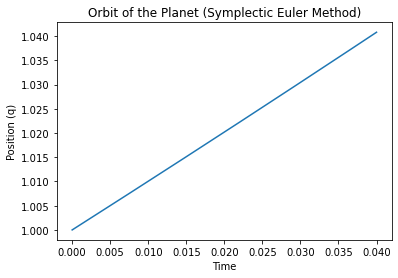

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the partial derivative of the Hamiltonian with respect to q
def Hq(q, p):
    return p

# Function to compute the partial derivative of the Hamiltonian with respect to p
def Hp(q, p):
    return q

# Symplectic Euler method
def symplectic_euler(q, p, dt):
    p = p - dt * Hq(q, p)
    q = q + dt * Hp(q, p)
    return q, p

# Parameters
e = 0.6
Tf = 200
dt = 0.0000001  
num_steps = 400000

# Initial conditions
q = 1.0
p = 0.0

# Time array
time = np.arange(0, num_steps * dt, dt)

# Orbit simulation using symplectic Euler
orbit = []
for _ in range(num_steps):
    orbit.append(q)
    q, p = symplectic_euler(q, p, dt)

# Plotting
plt.plot(time, orbit)
plt.title("Orbit of the Planet (Symplectic Euler Method)")
plt.xlabel("Time")
plt.ylabel("Position (q)")
plt.show()